# pandas

Un outils de manipulation de tableau hétérogène.

Il permet de manipule de grand tableau avec des label pour les lignes et les colonnes.

Très adapté aux stats.

L'idée vient de language R.

DataFrame = Tableau de data 2D

Series = colonne de data 1D



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series = 1D

In [2]:
s = pd.Series([7, 'yep', 'yop', 20.60])
s

0       7
1     yep
2     yop
3    20.6
dtype: object

In [3]:
s = pd.Series(['sam', 'garcia', 75000.],
              index=['prenom', 'nom', 'salaire_annuel'])
s

prenom               sam
nom               garcia
salaire_annuel     75000
dtype: object

In [4]:
s['nom']

'garcia'

In [5]:
s['nom'] = 'Garcia'
s

prenom               sam
nom               Garcia
salaire_annuel     75000
dtype: object

In [6]:
s.values

array(['sam', 'Garcia', 75000.0], dtype=object)

In [7]:
s.index

Index(['prenom', 'nom', 'salaire_annuel'], dtype='object')

In [8]:
# Filtrage

In [9]:
d = {'OFC':10., 'PRL' : 50., 'APC' : 12.46, 'CA1': np.nan, 'DG':  20.6}
nb_cell = pd.Series(d)
print(nb_cell)



OFC    10.00
PRL    50.00
APC    12.46
CA1      NaN
DG     20.60
dtype: float64


In [10]:
nb_cell[nb_cell>15.]

PRL    50.0
DG     20.6
dtype: float64

In [11]:
over_thresh = nb_cell>15.
over_thresh

OFC    False
PRL     True
APC    False
CA1    False
DG      True
dtype: bool

In [12]:
'DG' in nb_cell

True

 ## c'est comme numpy : opérateur possible

In [13]:
square = nb_cell**2
square

OFC     100.0000
PRL    2500.0000
APC     155.2516
CA1          NaN
DG      424.3600
dtype: float64

In [14]:
zscore = (nb_cell-nb_cell.mean())/nb_cell.std()
zscore

OFC   -0.721318
PRL    1.453783
APC   -0.587549
CA1         NaN
DG    -0.144916
dtype: float64

## missing values

In [15]:
nb_cell.isnull()

OFC    False
PRL    False
APC    False
CA1     True
DG     False
dtype: bool

In [16]:
nb_cell.notnull()

OFC     True
PRL     True
APC     True
CA1    False
DG      True
dtype: bool

In [17]:
nb_cell[nb_cell.notnull()]

OFC    10.00
PRL    50.00
APC    12.46
DG     20.60
dtype: float64

# DataFrame = 2D

C'est un tableau avec chaque colonne = une Series



In [18]:
data = {
    'name':['alex', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 83.5, 100., 19.3],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur




,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,False,True,83.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


index plus explicit

In [19]:
formateur.index = ['ac', 'sg',  'dm']
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


# inspection

In [20]:
formateur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ac to dm
Data columns (total 5 columns):
name                   3 non-null object
sex                    3 non-null object
alcohol_consumption    3 non-null bool
drug_consumption       2 non-null object
coding_level           3 non-null float64
dtypes: bool(1), float64(1), object(3)
memory usage: 123.0+ bytes


In [21]:
formateur.dtypes

name                    object
sex                     object
alcohol_consumption       bool
drug_consumption        object
coding_level           float64
dtype: object

In [22]:
formateur.columns

Index(['name', 'sex', 'alcohol_consumption', 'drug_consumption',
       'coding_level'],
      dtype='object')

In [23]:
formateur.index

Index(['ac', 'sg', 'dm'], dtype='object')

In [24]:
formateur.describe()

,coding_level
count,3.000000
mean,67.600000
std,42.634845
min,19.300000
25%,51.400000
50%,83.500000
75%,91.750000
max,100.000000


## selectionner une colone

par dict ou attribut

In [25]:
print(formateur['name'])
print(formateur.name)
print(type(formateur.name))

ac     alex
sg      sam
dm    david
Name: name, dtype: object
ac     alex
sg      sam
dm    david
Name: name, dtype: object
<class 'pandas.core.series.Series'>


## selectionner plusieurs colonnes

In [26]:
formateur[['alcohol_consumption', 'drug_consumption']]


,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


## la vrai syntax pour selectionner : DataFrame.loc[]

In [27]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


In [28]:
# ligne
formateur.loc[['sg', 'dm'], :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [29]:
formateur.loc[['sg', 'dm'], ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,NaN
dm,True,False


## syntax pour selectionner par compteur : DataFrame.iloc[]

C'est comme numpy en 2D!!!

In [30]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]
formateur.iloc[:, 2:4]


,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


In [31]:
# ligne
formateur.iloc[::2, :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
dm,david,M,True,False,19.3


In [32]:
formateur.iloc[::2, 2:4]

,alcohol_consumption,drug_consumption
ac,False,True
dm,True,False


## selectioner par condition





In [33]:
f = formateur[formateur['coding_level']>80.]
f = formateur[formateur.coding_level>80.]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
sg,sam,M,True,NaN,100.0


In [34]:
f = formateur[formateur.alcohol_consumption]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [35]:
f = formateur[formateur.drug_consumption.isnull()]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0


# lecure depuis fichier : XLS, CSV, (database, clipboard, ...)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel


In [36]:

data = pd.read_csv('./data/dataset_titanic.csv', sep=',', header=0, encoding='utf8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
data = pd.read_excel('./data/dataset_titanic.xlsx', sheet_name='train')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [38]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#data = data.set_index('PassengerId')
data.set_index('PassengerId', inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# export vers excel

In [40]:
data = {
    'name':['alex', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 73.5,100., 19.3,],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,False,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


In [41]:
formateur2 = formateur[['sex', 'alcohol_consumption', 'drug_consumption', 'coding_level']]
formateur2

,sex,alcohol_consumption,drug_consumption,coding_level
0,F,False,True,73.5
1,M,True,NaN,100.0
2,M,True,False,19.3


In [42]:
writer = pd.ExcelWriter('formateur.xlsx')
formateur.to_excel(writer, sheet_name='avec nom')
formateur2.to_excel(writer, sheet_name='anonyme')
writer.save()

# export vers hdf5

In [43]:
store = pd.HDFStore('allmydata.h5')
store['formateur'] = formateur
store['formateur2'] = formateur2
store.close()


/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['name', 'sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)


# groupby

![title](img/groupby.png)

Source: Gratuitously borrowed from Hadley Wickham's Data Science in R slides


In [6]:
# from pandas_datareader  import wb
# indicator = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
# data = wb.download(indicator=indicator, country='all', start=2005, end=2011) #.dropna()
# data.columns = ['gdp', 'cellphone']
# data.reset_index(inplace=True)
# data.to_excel('data/country_gpd_cellphone.xlsx')

In [7]:
data = pd.read_excel('data/country_gpd_cellphone.xlsx')
data

,country,year,gdp,cellphone
0,Arab World,2011,5990.917180,NaN
1,Arab World,2010,5918.315891,NaN
2,Arab World,2009,5785.710406,NaN
3,Arab World,2008,5899.879787,NaN
4,Arab World,2007,5715.905696,NaN
5,Arab World,2006,5601.023733,NaN
6,Arab World,2005,5384.848325,NaN
7,Caribbean small states,2011,9100.464272,NaN
8,Caribbean small states,2010,9059.000053,NaN
9,Caribbean small states,2009,8986.029234,NaN


In [8]:
data.describe()

,year,gdp,cellphone
count,2268.000000,1723.000000,268.000000
mean,2008.000000,13919.384647,75.483866
std,2.000441,20785.957137,22.743860
min,2005.000000,219.356176,0.770000
25%,2006.000000,1511.673572,64.727344
50%,2008.000000,4896.824441,82.031818
75%,2010.000000,15916.717842,92.000000
max,2011.000000,167533.014031,100.000000


In [9]:
grouped = data.groupby('country')
grouped

In [10]:
mgdp = grouped['gdp'].mean()
mgdp

country
Afghanistan                   450.211465
Africa                               NaN
Albania                      3688.555942
Algeria                      4379.981433
American Samoa              10434.520937
Andorra                     44439.133889
Angola                       3385.431625
Antigua and Barbuda         13594.809504
Arab World                   5756.657288
Argentina                    9725.031683
Armenia                      3175.429334
Aruba                       25861.451855
Australia                   50999.548075
Austria                     46742.888377
Azerbaijan                   4891.308059
Bahamas, The                29528.786953
Bahrain                     21328.239571
Bangladesh                    696.354551
Barbados                    16485.023893
Belarus                      5468.713892
Belgium                     44174.450533
Belize                       4354.840602
Benin                         750.307199
Bermuda                     90299.109894
Bhutan  

In [11]:
grouped['cellphone'].mean()

country
Afghanistan                       NaN
Africa                      77.130678
Albania                           NaN
Algeria                     62.206667
American Samoa                    NaN
Andorra                           NaN
Angola                      40.000000
Antigua and Barbuda               NaN
Arab World                        NaN
Argentina                         NaN
Armenia                           NaN
Aruba                             NaN
Australia                         NaN
Austria                           NaN
Azerbaijan                        NaN
Bahamas, The                      NaN
Bahrain                           NaN
Bangladesh                        NaN
Barbados                          NaN
Belarus                           NaN
Belgium                           NaN
Belize                            NaN
Benin                       76.857143
Bermuda                           NaN
Bhutan                            NaN
Bolivia                           NaN
Bosn

In [12]:
m = data.groupby('year')[['gdp', 'cellphone']].mean()
m

,gdp,cellphone
year,,
2005,13273.537972,59.556061
2006,13740.458838,64.030260
2007,14188.598077,76.937460
2008,14228.389774,83.960847
2009,13573.980534,84.852044
2010,14408.068075,86.360078
2011,14013.346972,84.913455


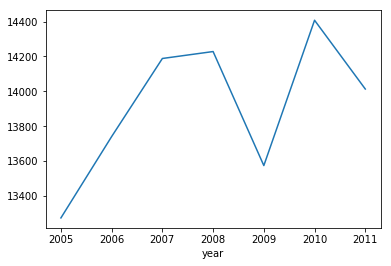

In [13]:
m['gdp'].plot()

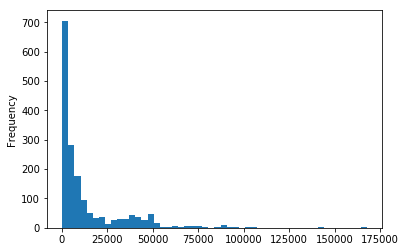

In [15]:
data['gdp'].plot.hist(bins=50)

# stack /unstack et multindex

In [20]:
# creation du multiindex
data2 = data.iloc[:200][['country', 'year', 'gdp']]
data2.set_index([ 'country','year', ], inplace=True)
data2


gdp
country                                      year              
Arab World                                   2011   5990.917180
                                             2010   5918.315891
                                             2009   5785.710406
                                             2008   5899.879787
                                             2007   5715.905696
                                             2006   5601.023733
                                             2005   5384.848325
Caribbean small states                       2011   9100.464272
                                             2010   9059.000053
                                             2009   8986.029234
                                             2008   9376.574098
                                             2007   9320.983977
                                             2006   9089.439105
                                             2005   8566.189483
Central Europe and the Baltics               2011  13000.437357
                                             2010  12551.880225
                                             2009  12295.919347
                                             2008  12717.557849
                                             2007  12213.212369
                                             2006  11436.079083
                                             2005  10703.528188
Early-demographic dividend                   2011   3038.491985
                                             2010   2931.116467
                                             2009   2795.135408
                                             2008   2818.251481
                                             2007   2763.360316
                                             2006   2643.236636
                                             2005   2526.189304
East Asia & Pacific                          2011   7977.522825
                                             2010   7676.520589
...                                                         ...
Least developed countries: UN classification 2009    757.678503
                                             2008    741.659777
                                             2007    708.559519
                                             2006    668.772736
                                             2005    636.063528
Low & middle income                          2011   3699.051940
                                             2010   3531.695094
                                             2009   3330.301572
                                             2008   3291.956141
                                             2007   3156.200041
                                             2006   2945.190996
                                             2005   2764.487617
Low income                                   2011    651.590011
                                             2010    641.751105
                                             2009    614.497769
                                             2008    599.844931
                                             2007    587.811059
                                             2006    569.976451
                                             2005    559.228275
Lower middle income                          2011   1739.250926
                                             2010   1673.463906
                                             2009   1581.796395
                                             2008   1528.476394
                                             2007   1478.990904
                                             2006   1393.715922
                                             2005   1318.673372
Middle East & North Africa                   2011   7234.311308
                                             2010   7126.771934
                                             2009   6933.149464
                                             2008   7046.009046

[200 rows x 1 columns]

In [21]:
data3 = data2.unstack('year')
data3

gdp  \
year                                                        2005   
country                                                            
Arab World                                           5384.848325   
Caribbean small states                               8566.189483   
Central Europe and the Baltics                      10703.528188   
Early-demographic dividend                           2526.189304   
East Asia & Pacific                                  6295.724615   
East Asia & Pacific (IDA & IBRD countries)           2638.839441   
East Asia & Pacific (excluding high income)          2610.674116   
Euro area                                           36845.650760   
Europe & Central Asia                               22471.426398   
Europe & Central Asia (IDA & IBRD countries)         6920.679077   
Europe & Central Asia (excluding high income)        6556.835974   
European Union                                      32752.171572   
Fragile and conflict affected situations             1273.515405   
Heavily indebted poor countries (HIPC)                652.977319   
High income                                         37523.142446   
IBRD only                                            3491.927552   
IDA & IBRD total                                     2905.991821   
IDA blend                                            1329.118177   
IDA only                                              670.446173   
IDA total                                             892.515158   
Late-demographic dividend                            4551.004483   
Latin America & Caribbean                            7955.172321   
Latin America & Caribbean (excluding high income)    7592.878953   
Latin America & the Caribbean (IDA & IBRD count...   7852.028845   
Least developed countries: UN classification          636.063528   
Low & middle income                                  2764.487617   
Low income                                            559.228275   
Lower middle income                                  1318.673372   
Middle East & North Africa                                   NaN   

                                                                  \
year                                                        2006   
country                                                            
Arab World                                           5601.023733   
Caribbean small states                               9089.439105   
Central Europe and the Baltics                      11436.079083   
Early-demographic dividend                           2643.236636   
East Asia & Pacific                                  6596.032678   
East Asia & Pacific (IDA & IBRD countries)           2900.723729   
East Asia & Pacific (excluding high income)          2869.772319   
Euro area                                           37861.104040   
Europe & Central Asia                               23284.684684   
Europe & Central Asia (IDA & IBRD countries)         7453.854606   
Europe & Central Asia (excluding high income)        7080.925626   
European Union                                      33722.533998   
Fragile and conflict affected situations             1325.833121   
Heavily indebted poor countries (HIPC)                673.166020   
High income                                         38371.066390   
IBRD only                                            3732.618610   
IDA & IBRD total                                     3093.991500   
IDA blend                                            1377.113531   
IDA only                                              698.138406   
IDA total                                             926.760514   
Late-demographic dividend                            4917.846340   
Latin America & Caribbean                            8268.717574   
Latin America & Caribbean (excluding high income)    7877.654253   
Latin America & the Caribbean (IDA & IBRD count...   8166.087692   
Least developed countries: UN classification    

# merge/concat/alignement

pd.concat permet de concatener des tableaux

Attention pandas aligne tout seul data en fonction des l'index.
Il remplit tout seul les missing values.


In [25]:
m1 = pd.DataFrame(np.arange(15).reshape(5,3), columns=['a', 'b', 'c'], index=[12., 12.8, 14.2, 21.2, 4.])
display(m1)
m2 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['b', 'c', 'd'], index=[15., 23., 18.3])
display(m2)

,a,b,c
12.0,0,1,2
12.8,3,4,5
14.2,6,7,8
21.2,9,10,11
4.0,12,13,14


,b,c,d
15.0,0,1,2
23.0,3,4,5
18.3,6,7,8


In [63]:
pd.concat([m1,m2], axis=0)

,a,b,c,d
12.0,0.0,1,2,NaN
12.8,3.0,4,5,NaN
14.2,6.0,7,8,NaN
21.2,9.0,10,11,NaN
4.0,12.0,13,14,NaN
15.0,NaN,0,1,2.0
23.0,NaN,3,4,5.0
18.3,NaN,6,7,8.0
